In [4]:
import pandas as pd # baca df
import numpy as np  #baca numpy tapi dalam bentuk pd
import seaborn as sns #visualisasi
import matplotlib.pyplot as plt # visualisasi dalam bentuk plt
from scipy import stats #statistik

import warnings
warnings.filterwarnings("ignore") # mengabaikan warning 



In [5]:
data = pd.read_csv("/Users/mac/Documents/Project 1/Mall_Customers.csv")
data 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
jumlah_kolom, jumlah_baris = data.shape # hitung jumlah kolom dan baris pakai df shape
print("Jumlah Kolom:", jumlah_kolom)
print("Jumlah baris:", jumlah_baris)

Jumlah Kolom: 200
Jumlah baris: 5


In [7]:
data.head() # 5 baris pertama didata

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.info() #nampilin informasi tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe() #hitung statistik desk data numerik saja

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.isnull().sum() #jumllah nilai null setiap kolom

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

nah karena datanya tidak ada nilai null jadinya tidak usah dibersihkan. sehingga mempermudah kita untuk melanjutkan code.

## ***Ekspolorasi Data Analysis***

#### *laki-laki*

#### ***Menghitung Jumlah Laki-Laki / Perempuan dan Mean Laki-Laki/ Perempuan Bedasarkan Umur menggunakan mean***

Text(45, 22, 'Mean age: 39.8')

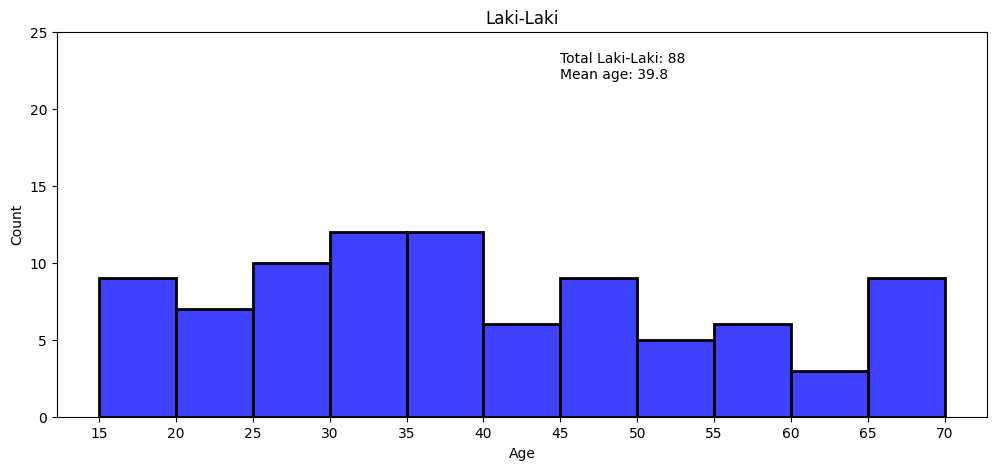

In [11]:
male_Age = data[data["Genre"]=="Male"]["Age"] #memisahkan data laki-laki bedasarkan Genre dan Mengecek umur

Age_bins = range(15,75,5) #range umur dari 15 sampai 75 dengan interval 5

#histogram 
fig2, (ax1) = plt.subplots(figsize=(12,5), sharey=True) # figure menjadi 1 bagian dengan ukuran 12x5 d
sns.histplot(male_Age, bins=Age_bins, kde=False, color="Blue", ax=ax1, edgecolor="k", linewidth=2) #menampilkan histogram  laki-laki dengan rentang umur yang sudah ditetapkan, warna biru, garis tepi hitam, ketebalan 2
ax1.set_xticks(Age_bins) #grafik sumbu x
ax1.set_ylim(top=25) #sumbu y dengan batas atas 25
ax1.set_title("Laki-Laki") #membuat judul
ax1.set_ylabel("Count") #sumbu y nya jumlah keseluruhan
ax1.text(45,23, "Total Laki-Laki: {}".format(male_Age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(male_Age.mean()))

Text(45, 22, 'Mean age: 38.1')

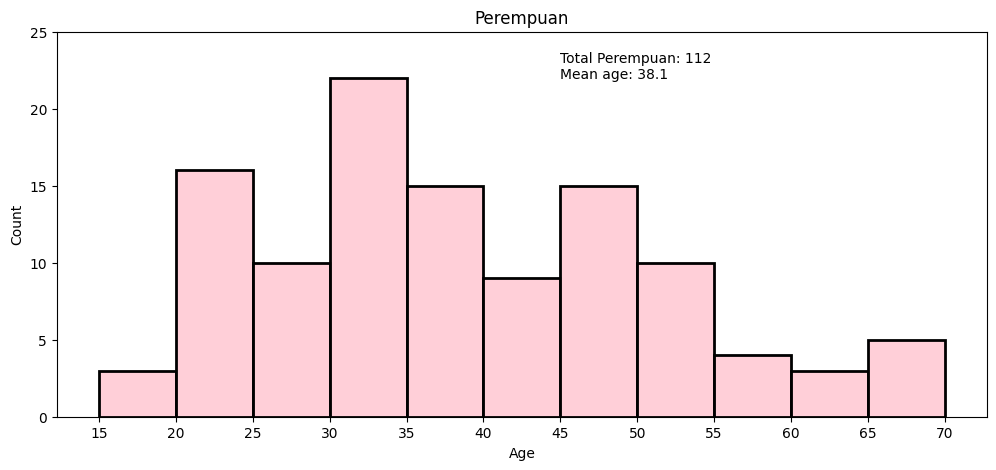

In [12]:
female_Age = data[data["Genre"]=="Female"]["Age"] #memisahkan data laki-laki bedasarkan Genre dan Mengecek umur

Age_bins = range(15,75,5) #range umur dari 15 sampai 75 dengan interval 5

#histogram 
fig2, (ax2) = plt.subplots(figsize=(12,5), sharey=True) # figure menjadi 1 bagian dengan ukuran 12x5 d
sns.histplot(female_Age, bins=Age_bins, kde=False, color="Pink", ax=ax2, edgecolor="k", linewidth=2) #menampilkan histogram  laki-laki dengan rentang umur yang sudah ditetapkan, warna Pink, garis tepi hitam, ketebalan 2
ax2.set_xticks(Age_bins) #grafik sumbu x
ax2.set_ylim(top=25) #sumbu y dengan batas atas 25 
ax2.set_title("Perempuan") #membuat judul
ax2.set_ylabel("Count") #sumbu y nya jumlah keseluruhan
ax2.text(45,23, "Total Perempuan: {}".format(female_Age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(female_Age.mean()))

In [13]:
print("Kolmogorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(male_Age, female_Age)[1]))

Kolmogorov-Smirnov test p-value: 0.49


✅ Interpretasi P-Value = 0.49:

Nilai P	Arti

P > 0.05	Tidak cukup bukti untuk menolak H₀ → Data mungkin berasal dari distribusi yang diuji

P ≤ 0.05	Tolak H₀ → Data tidak berasal dari distribusi tersebut

rata-rata umur custemer laki-laki sedikit tinggi dsri pada perempuan (29.8 vs 38.1). distribusi umur laki-lai lebih beragam dari pada perempuan. dimana kita dapat observasi besaran umur kelopok 30-35 tahun. Kolmogrov-smirnov menunjukkan statistik perbedaan tidak signifikan antara 2 hal ini. 

#### ***perbandingan presentase laki-laki/perempuan dan keseluruhan***

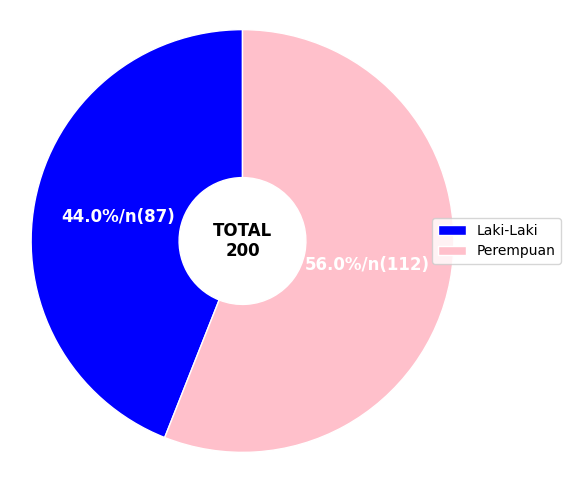

In [14]:
def labeler(pct, allvals): #fungsi buat pie chart
    absolute = int(pct/100.*np.sum(allvals)) # menghitung nilai absolute
    return "{:.1f}%/n({:d})".format(pct, absolute) # mengembalikan string dengan persentase dan nilai absolute

sizes = [male_Age.count(), female_Age.count()] # menghitung jumlah laki-laki dan Perempuan

fig, ax1 = plt.subplots(figsize=(6, 6)) # fikure 6x6
wedges, texts, autotexts = ax1.pie(sizes,# ukuran pie chart dan sebagainya
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=["Blue","Pink"],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor="w"))

ax1.legend (wedges, ["Laki-Laki", "Perempuan"], # membuat lagenda
           loc="center right",
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, "TOTAL\n{}".format(data["Age"].count()), # text keseluruhannya berapa
          weight="bold", size=12, color="black",
          ha="center", va="center")

plt.setp(autotexts, size=12, weight="bold") # ukuran dan ketebalan secara otomatis
ax1.axis("equal")
plt.show()
 

ada sedikit lebih banyak perempuan dari pada laki-lai (112 vs 87). perempuan sekitar 56 % dari total customer

#### ***Menghitung Jumlah Laki-Laki / Perempuan dan Bedasarkan Annual Income dengan mean, median, dan standar deviansi lalu membandingkan keduanya menggunakan boxplot***

Text(85, 17, 'Std. Deviation: 26.6k$')

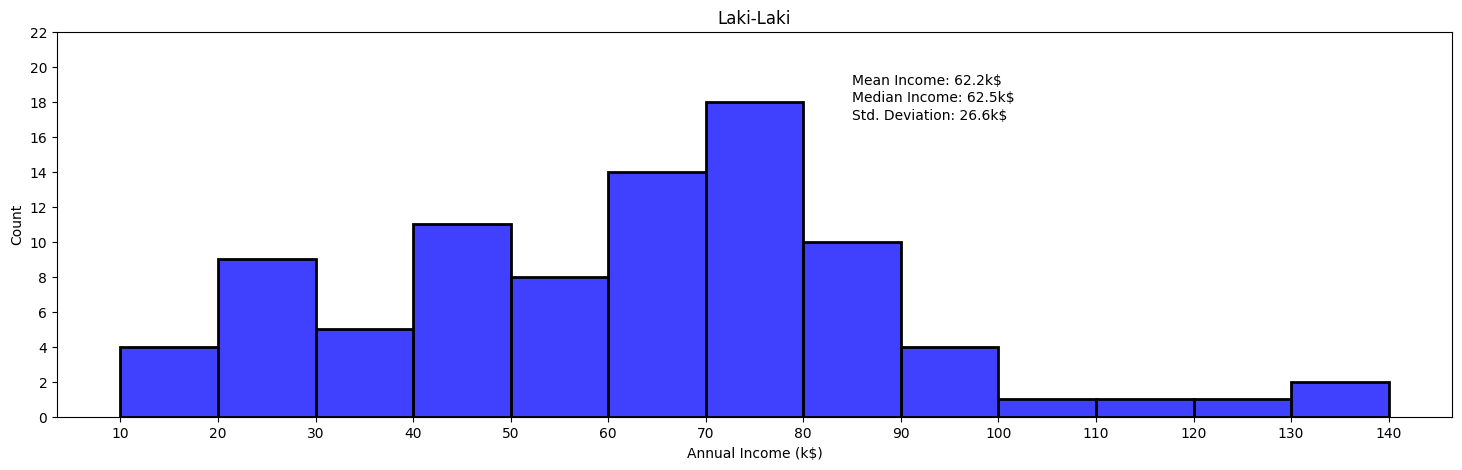

In [15]:
male_Income = data[data["Genre"]=="Male"]["Annual Income (k$)"] #memisahkan data laki-laki bedasarkan Genre dengan Annual Income 

my_bins = range(10,150,10) #range umur dari 10 sampai 150 dengan interval 10

#histogram 
fig, (ax1) = plt.subplots(figsize=(18,5)) # figure menjadi 1 bagian dengan ukuran 18x5 d
sns.histplot(male_Income, bins=my_bins, kde=False, color="Blue", ax=ax1, edgecolor="k", linewidth=2) #menampilkan histogram  laki-laki dengan rentang umur yang sudah ditetapkan, warna biru, garis tepi hitam, ketebalan 2
ax1.set_xticks(my_bins) #grafik sumbu x
ax1.set_yticks(range(0,24,2)) # sumbu y interval 2
ax1.set_ylim(0,22) #sumbu y dengan batas atas 22
ax1.set_title("Laki-Laki") #membuat judul
ax1.set_ylabel("Count") #sumbu y nya jumlah keseluruhan
ax1.text(85,19, "Mean Income: {:.1f}k$".format(male_Income.mean()))
ax1.text(85,18, "Median Income: {:.1f}k$".format(male_Income.median()))
ax1.text(85,17, "Std. Deviation: {:.1f}k$".format(male_Income.std()))

Text(85, 17, 'Std. Deviation: 26.0k$')

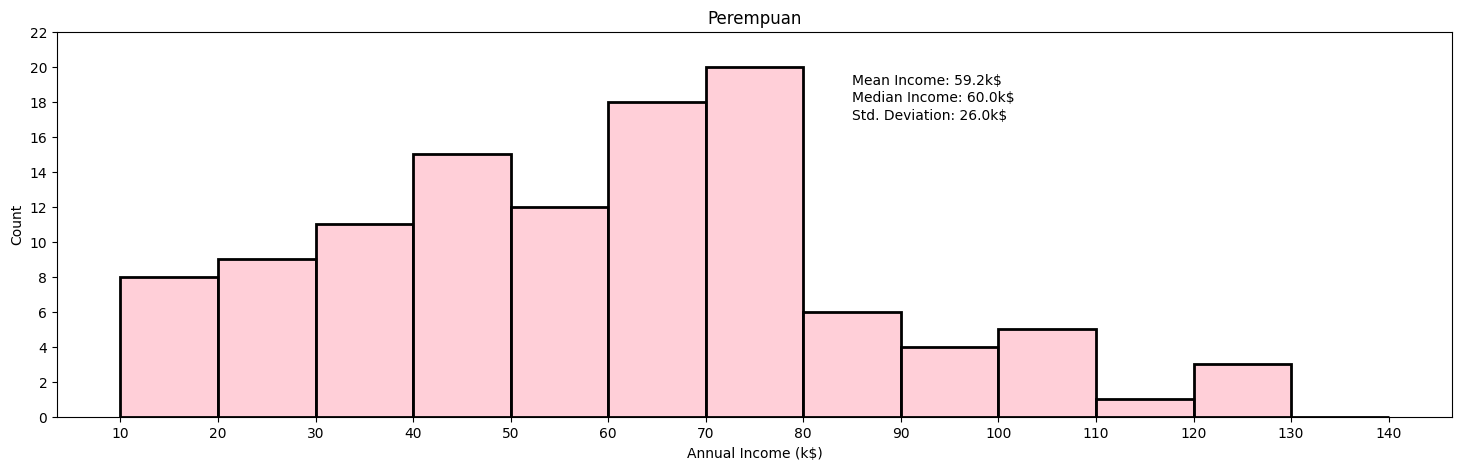

In [16]:
female_Income = data[data["Genre"]=="Female"]["Annual Income (k$)"] #memisahkan data laki-laki bedasarkan Genre dengan Annual Income 

my_bins = range(10,150,10) #range umur dari 10 sampai 150 dengan interval 10

#histogram 
fig, (ax2) = plt.subplots(figsize=(18,5)) # figure menjadi 1 bagian dengan ukuran 18x5 d
sns.histplot(female_Income, bins=my_bins, kde=False, color="pink", ax=ax2, edgecolor="k", linewidth=2) #menampilkan histogram  laki-laki dengan rentang umur yang sudah ditetapkan, warna biru, garis tepi hitam, ketebalan 2
ax2.set_xticks(my_bins) #grafik sumbu x
ax2.set_yticks(range(0,24,2)) # sumbu y interval 2
ax2.set_ylim(0,22) #sumbu y dengan batas atas 22
ax2.set_title("Perempuan") #membuat judul
ax2.set_ylabel("Count") #sumbu y nya jumlah keseluruhan
ax2.text(85,19, "Mean Income: {:.1f}k$".format(female_Income.mean()))
ax2.text(85,18, "Median Income: {:.1f}k$".format(female_Income.median()))
ax2.text(85,17, "Std. Deviation: {:.1f}k$".format(female_Income.std()))

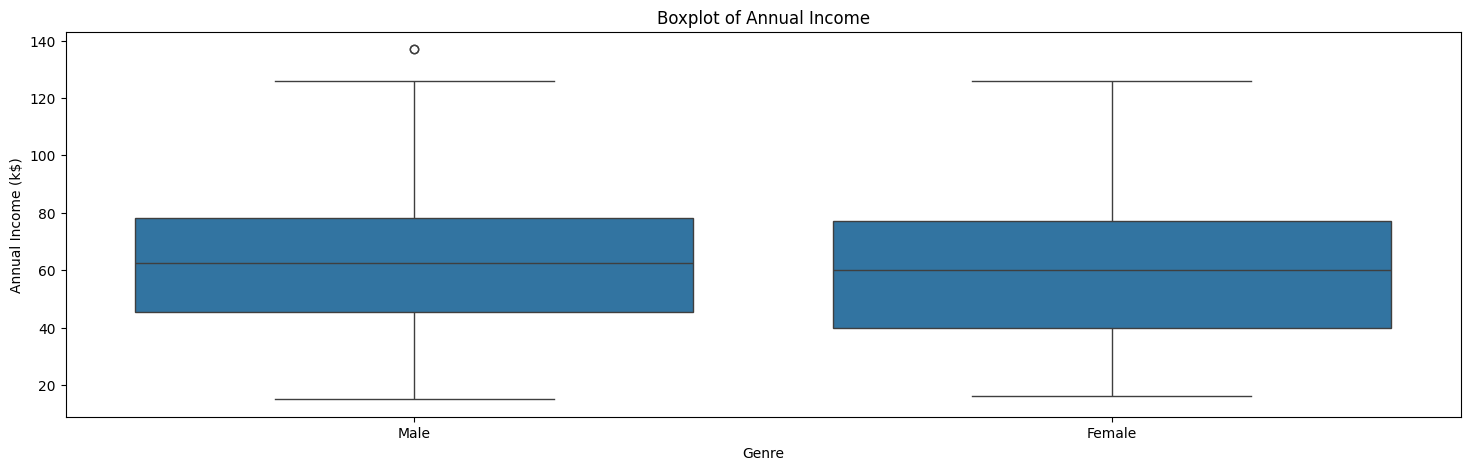

In [17]:
fig, (ax3) = plt.subplots(figsize=(18,5))
sns.boxplot(x="Genre", y="Annual Income (k$)", data=data, ax=ax3)
ax3.set_title("Boxplot of Annual Income")
plt.show()

In [18]:
print("Kolmogorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(male_Income, female_Income)[1]))

Kolmogorov-Smirnov test p-value: 0.78


mean income dari laki-laki lebih tinggi dari pada perempuan (62.2 K$ 59.2 K$). juga median income customer laki-laki (62.5K$) lebih tinggi dari pada perempuan sekitar (60k$). standar deviasi serupa antara keduanya. ada satu outlier laki-laki dengan tentang annual income 140k$. K-s Test menunjukan perbedaan signifikan antara keduannya.

#### ***Menghitung Jumlah pengeluaran Laki-Laki / Perempuan dan  dengan mean, median, dan standar deviansi lalu membandingkan keduanya menggunakan boxplot***

Text(50, 13, 'Std. Deviation: 27.9')

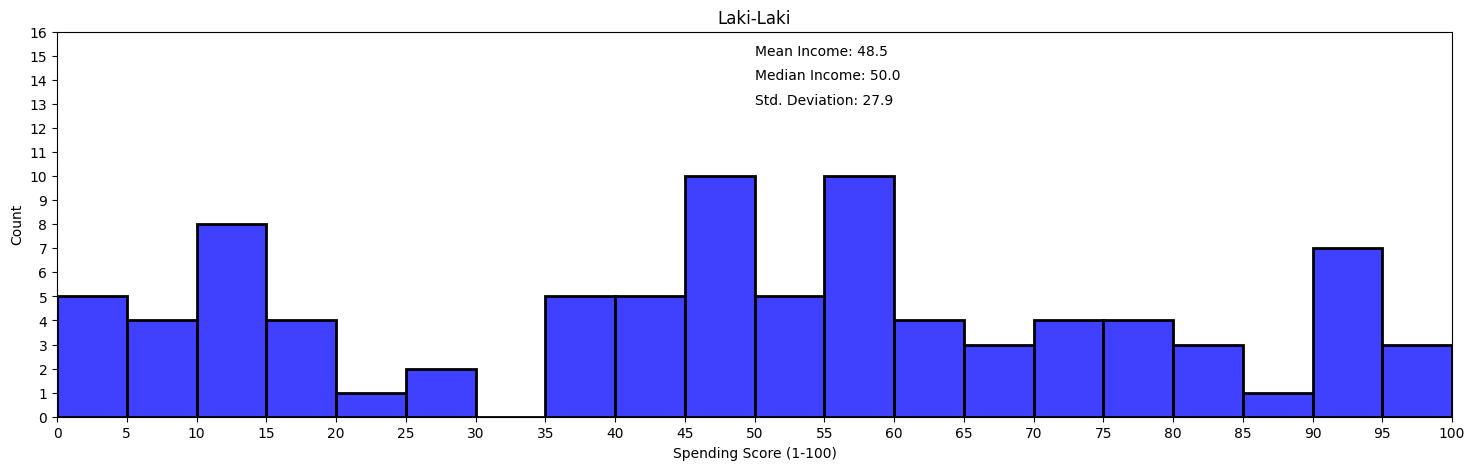

In [19]:
male_Spending = data[data["Genre"]=="Male"]["Spending Score (1-100)"] #memisahkan data laki-laki bedasarkan total pengeluaran

spending_bins = range(0,105,5) #range umur dari 0 sampai 105 dengan interval 5

#histogram 
fig, (ax1) = plt.subplots(figsize=(18,5)) # figure menjadi 1 bagian dengan ukuran 18x5 d
sns.histplot(male_Spending, bins=spending_bins, kde=False, color="Blue", ax=ax1, edgecolor="k", linewidth=2) #menampilkan histogram  laki-laki dengan rentang umur yang sudah ditetapkan, warna biru, garis tepi hitam, ketebalan 2
ax1.set_xticks(spending_bins) #grafik sumbu x
ax1.set_yticks(range(0,17,1)) # sumbu y interval 2
ax1.set_xlim(0,100) # sumbu x dengan batas 100
ax1.set_ylim(0,16) #sumbu y dengan batas atas 16
ax1.set_title("Laki-Laki") #membuat judul
ax1.set_ylabel("Count") #sumbu y nya jumlah keseluruhan
ax1.text(50,15, "Mean Income: {:.1f}".format(male_Spending.mean()))
ax1.text(50,14, "Median Income: {:.1f}".format(male_Spending.median()))
ax1.text(50,13, "Std. Deviation: {:.1f}".format(male_Spending.std()))

Text(50, 13, 'Std. Deviation: 24.1')

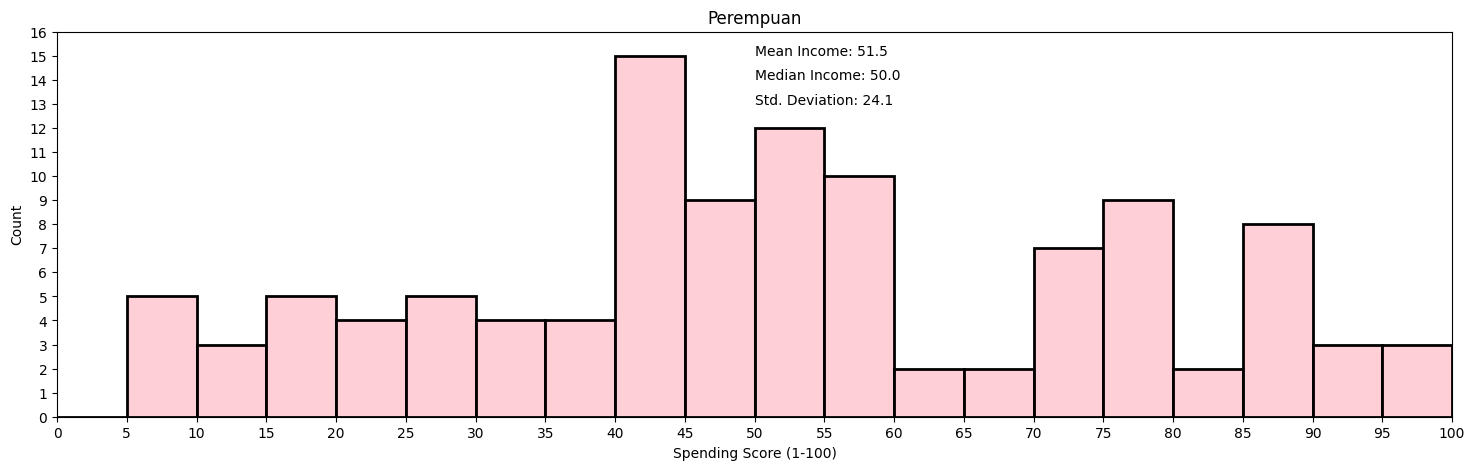

In [20]:
female_Spending = data[data["Genre"]=="Female"]["Spending Score (1-100)"] #memisahkan data laki-laki bedasarkan total pengeluaran

spending_bins = range(0,105,5) #range umur dari 0 sampai 105 dengan interval 5

#histogram 
fig, (ax2) = plt.subplots(figsize=(18,5)) # figure menjadi 1 bagian dengan ukuran 18x5 d
sns.histplot(female_Spending, bins=spending_bins, kde=False, color="Pink", ax=ax2, edgecolor="k", linewidth=2) #menampilkan histogram  perempuan dengan rentang umur yang sudah ditetapkan, warna biru, garis tepi hitam, ketebalan 2
ax2.set_xticks(spending_bins) #grafik sumbu x
ax2.set_yticks(range(0,17,1)) # sumbu y interval 
ax2.set_xlim(0,100) # sumbu x dengan batas 100
ax2.set_ylim(0,16) #sumbu y dengan batas atas 16
ax2.set_title("Perempuan") #membuat judul
ax2.set_ylabel("Count") #sumbu y nya jumlah keseluruhan
ax2.text(50,15, "Mean Income: {:.1f}".format(female_Spending.mean()))
ax2.text(50,14, "Median Income: {:.1f}".format(female_Spending.median()))
ax2.text(50,13, "Std. Deviation: {:.1f}".format(female_Spending.std()))

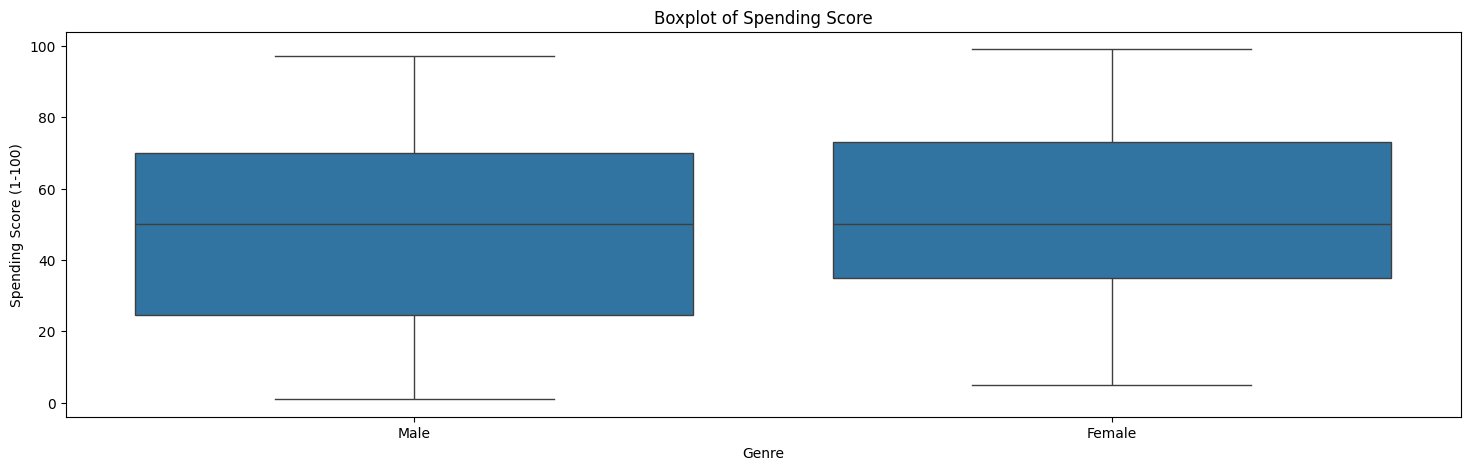

In [21]:
fig, (ax3) = plt.subplots(figsize=(18,5))
sns.boxplot(x="Genre", y="Spending Score (1-100)", data=data, ax=ax3)
ax3.set_title("Boxplot of Spending Score")
plt.show()

In [22]:
print("Kolmogorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(male_Spending, female_Spending)[1]))

Kolmogorov-Smirnov test p-value: 0.29


mean spending score perempuan (51.5) lebih tinggi dari pada laki-laki (48.5). K-S test p-value menunjukkkan dimana berdistribusi normal, hipotersis nol (H0). karena tidak ada bukti yang kuat untuk menunjukan bahwa data tidak normal (Gagal Menolak H0). selanjutnya saya akan menghitung median income untuk semua umur laki-laki dan perempuan

In [23]:
median_by_age_group = data.groupby(["Genre",pd.cut(data["Age"], Age_bins)]).median()
median_by_age_group.index = median_by_age_group.index.set_names(["Genre","Age_Group"])
median_by_age_group.reset_index(inplace=True)

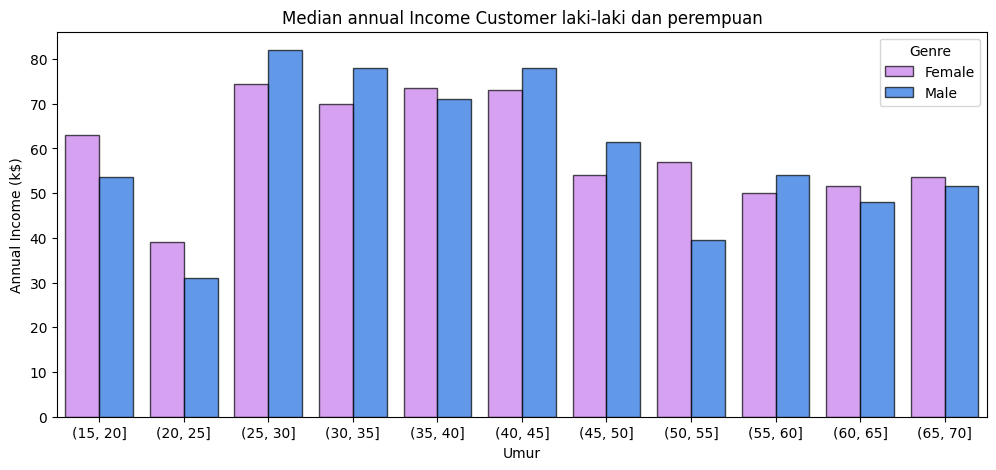

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x="Age_Group", y="Annual Income (k$)", hue="Genre", data=median_by_age_group,
            palette=["#cc66ff", "#0066ff"],
            alpha=0.7,edgecolor="k",
            ax=ax)
ax.set_title("Median annual Income Customer laki-laki dan perempuan")
ax.set_xlabel("Umur")
plt.show()

## ***Correlation***

#### ***Umur bedasarkan Spending Score***

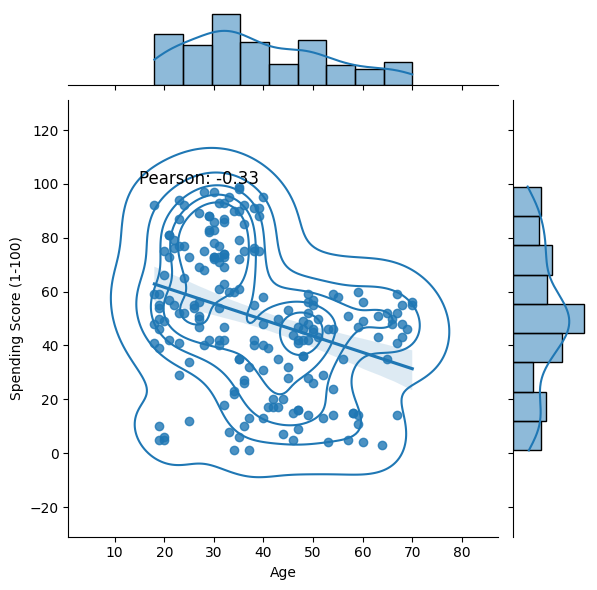

In [25]:
from scipy.stats import pearsonr # untuk mengukur korelasi liner antara dua variabel numerik

# Hitung korelasi Pearson
corr, _ = pearsonr(data["Age"], data["Spending Score (1-100)"])

# Plot jointplot dengan regresi dan KDE
jp = sns.jointplot(
    x="Age",
    y="Spending Score (1-100)",
    data=data,
    kind="reg"
)

# Tambahkan contour KDE
jp.plot_joint(sns.kdeplot, zorder=0, levels=6)

# Tambahkan teks korelasi
plt.text(15, 100, "Pearson: {:.2f}".format(corr), fontsize=12)

plt.show()

#### ***Umur bedasarkan Income***

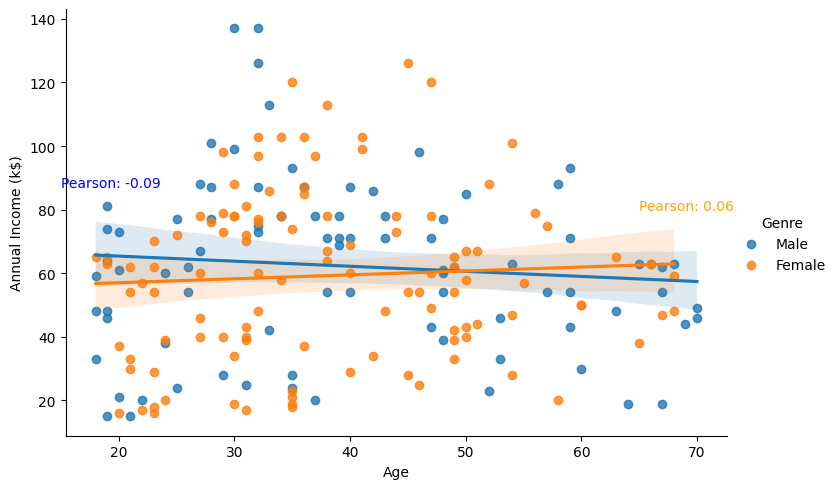

In [26]:
corr1, _ = pearsonr(male_Age.values, male_Income.values)
corr2, _ = pearsonr(female_Age.values, female_Income.values)

# Plot lmplot dengan regresi dan KDE
sns.lmplot(
    x="Age",
    y="Annual Income (k$)",
    data=data,
    hue="Genre",
    aspect=1.5
)

# Tambahkan teks korelasi
plt.text(15, 87, "Pearson: {:.2f}".format(corr1), color="Blue")
plt.text(65, 80, "Pearson: {:.2f}".format(corr2), color="Orange")
plt.show()


ada corelasi yang diabaikan antara umur dan annual income pada customer laki-laki dan perempuan

bar chart diatas  menunjukkan bahwa yang custemer paling kaya diumur 25-45 tahun. besaran perbedaan laki-laki dan perempuan terlihat umur 25-30 (dominan laki-laki kaya) dan  50-55 (dominan perempuan kaya)

#### ***Umur bedasarkan pengeluaran***

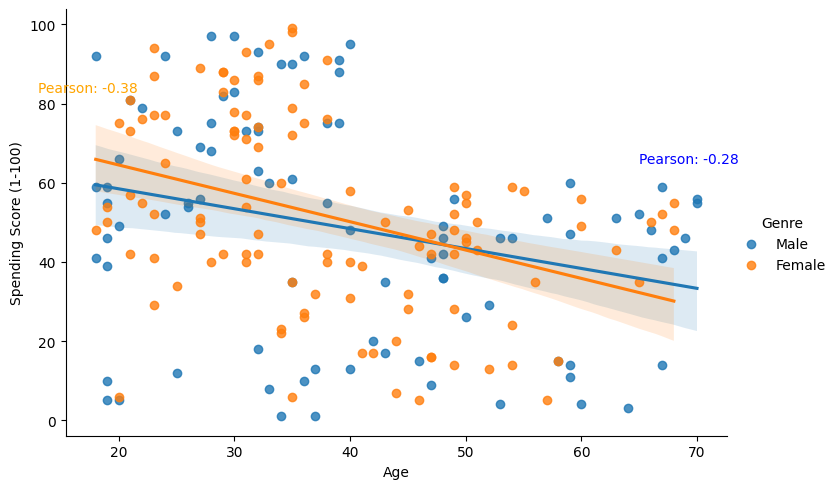

In [27]:
corr1, _ = pearsonr(male_Age.values, male_Spending.values)
corr2, _ = pearsonr(female_Age.values, female_Spending.values)

# Plot lmplot dengan regresi dan KDE
sns.lmplot(
    x="Age",
    y="Spending Score (1-100)",
    data=data,
    hue="Genre",
    aspect=1.5
)

# Tambahkan teks korelasi
plt.text(65, 65, "Pearson: {:.2f}".format(corr1), color="Blue")
plt.text(13, 83, "Pearson: {:.2f}".format(corr2), color="Orange")
plt.show()


 ada minggu yang corelasi negatif (<0.5) antara umur dan spending score untuk laki-laki dan perempuan.

#### ***Income bedasarkan Spending***

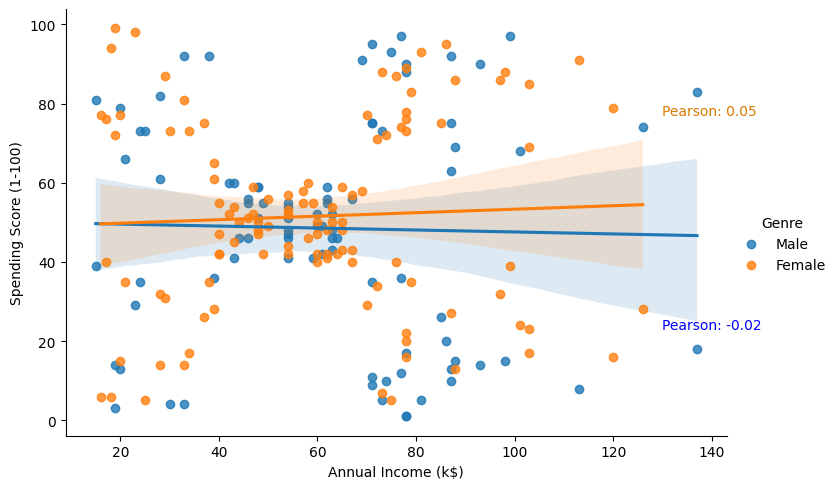

In [28]:
corr1, _ = pearsonr(male_Income.values, male_Spending.values)
corr2, _ = pearsonr(female_Income.values, female_Spending.values)

# Plot lmplot dengan regresi dan KDE
sns.lmplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    data=data,
    hue="Genre",
    aspect=1.5
)

# Tambahkan teks korelasi
plt.text(130, 23, "Pearson: {:.2f}".format(corr1), color="Blue")
plt.text(130, 77, "Pearson: {:.2f}".format(corr2), color="#d97900")
plt.show()


ada corelasi yang diabaikan antara annual income dan spending score dari customer laki-laki dan perempuan

bar char diatas menunjukan bahwa customer kaya diumur 25-45 tahun. besaran perbedaan antara laki-laki dan perempuan 25-30 (laki-laki kaya) dan 50-55 (perempuan kaya)

## ***Clustering***

1. K-Means
2. DBScan
3. Meanshift
4. Agglomerative

### ***K Means***

In [29]:
from sklearn.cluster import KMeans #rumus menghitung k-means

In [30]:
x_numerics = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] # hanya data variabel numerik saja

untuk menemukan nomor yang tepat di cluster, the elbow method dapat digunakan. dikasus ini metode untuk inertia pada nomor cluster antara 2 dan 10 dapat dihitung. dengan rule nomor tiap cluster dimana kamu melihat kink atau "an elbow" pada grafik

In [31]:
from sklearn.metrics import silhouette_score #rumus menghitung silhoutte score
n_clusters = [2,3,4,5,6,7,8,9,10] #nomor cluster
clusters_inertia = [] #cluster inertianya
s_score = [] #silhouette score

for n in n_clusters: #perulangan loop
    KM_est = KMeans(n_clusters=n, init="k-means++").fit(x_numerics) #untuk menguji kmeans dengan jumlah n 
    clusters_inertia.append(KM_est.inertia_) #inertia itu jumlah kuadrat jarak dari tiap point ke centroid
    silhouette_avg = silhouette_score(x_numerics, KM_est.labels_) #menghitung seberapa baik data dalam membandingkan dengan cluster lain
    s_score.append(silhouette_avg) #nilai rata-rata silhout disimpan ke dalam list s_score

grafik dibawah ini menunjukan inertia  dengan range yang dipilih tiap cluster

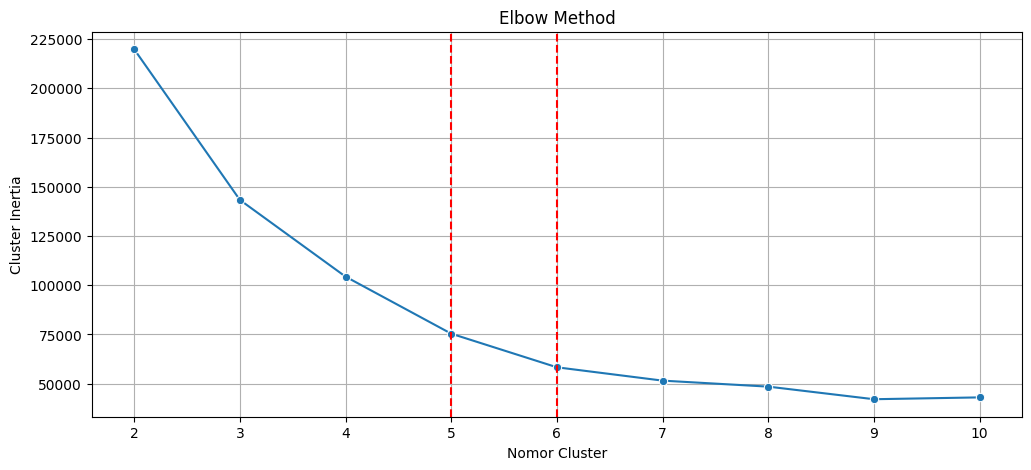

In [32]:
fig, ax = plt.subplots(figsize=(12,5)) #ukuran figurenya 12x5
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker="o", ax=ax) #membuat garif lineplotnya
ax.set_title("Elbow Method") #nama x atas
ax.set_xlabel("Nomor Cluster") # x bawah
ax.set_ylabel("Cluster Inertia") # y samping kiri
ax.axvline(5, ls="--", c="red") #menambahkan garis vertika axvline
ax.axvline(6,  ls="--", c="red") #5,6 garis tengahnya, ls buat garis putus" warna merah
plt.grid()
plt.show()


tidak ada yang terlihat jelas "elbow". pilihan antara 5 atau 6 cluster menunjukan untuk bersikap adil. mari kita lihat silhoutte score

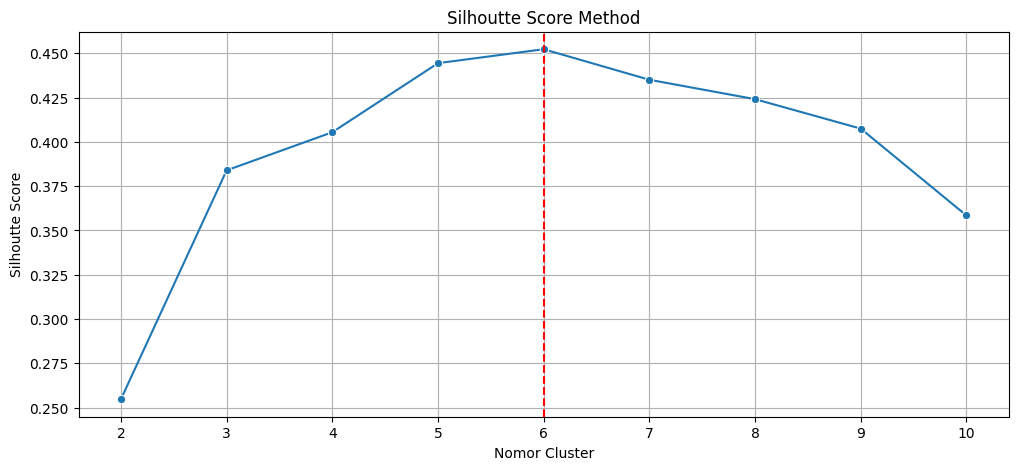

In [33]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_score, marker="o", ax=ax)
ax.set_title("Silhoutte Score Method")
ax.set_xlabel("Nomor Cluster")
ax.set_ylabel("Silhoutte Score")
ax.axvline(6,  ls="--", c="red")
plt.grid()
plt.show()


metode silhoutte score menunjukan opsi terbaik yang masing-masing 6 atau 5 cluster. mari menggabungkan keduanya.

In [34]:
KM_5_clusters = KMeans(n_clusters=5, init="k-means++").fit(x_numerics)  #inisialisasi 5 cluster dan mencocokan model k-means 

KM5_clustered = x_numerics.copy() #menyimpan salinan
KM5_clustered.loc[:,"cluster"] = KM_5_clusters.labels_ #menambahkan label ke point

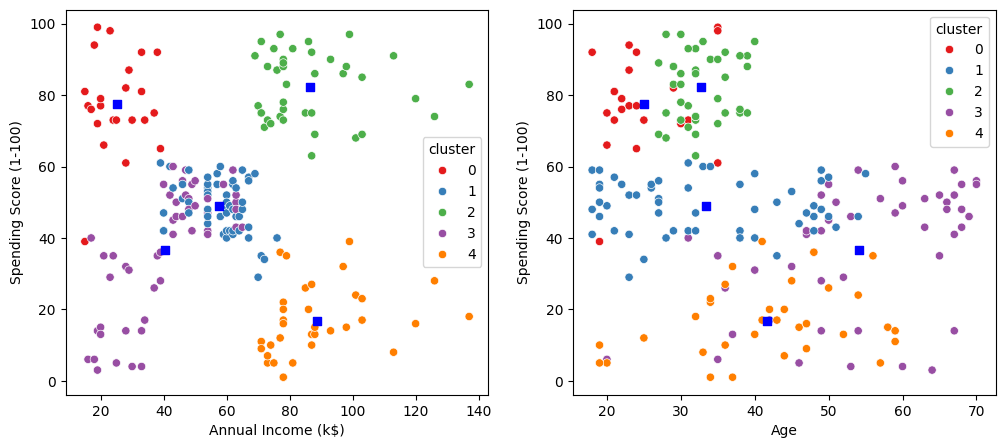

In [35]:
fig1, (axes) = plt.subplots(1,2, figsize=(12,5))

scat_1 = sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=KM5_clustered,
                         hue="cluster", ax=axes[0], palette="Set1", legend="full")

sns.scatterplot(x="Age", y="Spending Score (1-100)", data=KM5_clustered,
                hue="cluster", palette="Set1", ax=axes[1], legend="full")

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker="s", s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker="s", s=40, c="blue")

Algoritma K-Means menghasilkan 5 hal berikut ini:

* pembeli dengan penghasilan rendah dan tinggi jumlah pengeluaran
* Pembeli dengan penghasilan sedang dan sedang jumlah pengeluaran
* Pembeli dengan penghasilan tinggi dan rendah jumlah pengeluaran 
* Pembeli dengan penghasilan tinggi dan tinggi jumlah pengeluaran
* pembeli dengan penghasilan rendah dan rendah jumlah pengeluaran


tidak ada perbedaan ketentuan antara customer laki-laki dan perempuan bedasarkan umur

ukurang tiap cluster

In [36]:
KM5_clust_size = KM5_clustered.groupby("cluster").size().to_frame()
KM5_clust_size.columns = ["KM5_size"]
KM5_clust_size

,KM5_size
cluster,
0,23
1,54
2,39
3,50
4,34


cluster terbesar adalah cluster nomor 1 dengan 79 ovservasi ("Medium-Medium" pembeli). dua terkecil berisi 23 menunjukan (cluster 3 "high-high and cluster 0 "low-high" pembeli). dibawah ini ada project 3 d di 5 genarasi cluster. ini sangat tidak membantu ketentuan dari visualisasi mode statik, tapi jika kamu run code interatif ini lingkungan (e.g spyder) kamu dapat memutar itu.

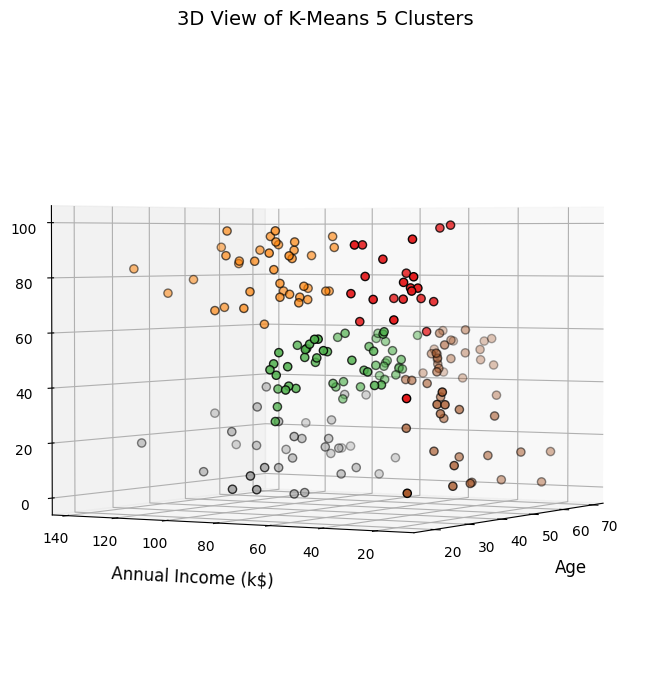

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))  # Ukuran lebih besar
ax = fig.add_subplot(111, projection='3d', elev=2, azim=210)

# Scatter 3D plot
ax.scatter(KM5_clustered["Age"],
           KM5_clustered["Annual Income (k$)"],
           KM5_clustered["Spending Score (1-100)"],
           c=KM5_clustered["cluster"],
           s=35, edgecolor="k", cmap=plt.cm.Set1)

# Label sumbu
ax.set_xlabel("Age", fontsize=12, labelpad=15)
ax.set_ylabel("Annual Income (k$)", fontsize=12, labelpad=15)
ax.set_zlabel("Spending Score (1–100)", fontsize=12, labelpad=15)

# Pastikan tidak ada baris ini
# ax.set_zticklabels([])

# Judul
ax.set_title("3D View of K-Means 5 Clusters", fontsize=14, pad=20)

# (Opsional) Rotasi label Z agar lebih jelas
ax.zaxis.label.set_rotation(90)

plt.tight_layout()
plt.show()


dibawah ini plotly version

In [38]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import plotly as py 
import plotly.graph_objs as go 

def tracer(db, n, name):
    return go.Scatter3d(
        x = db[db["cluster"]==n]["Age"],
        y = db[db["cluster"]==n]["Spending Score (1-100)"],
        z = db[db["cluster"]==n]["Annual Income (k$)"],
        mode = "markers",
        name = name,
        marker = dict(
            size = 5
        )
    )
    
tracer0 = tracer(KM5_clustered, 0, "Cluster 0")
tracer1 = tracer(KM5_clustered, 1, "Cluster 1")
tracer2 = tracer(KM5_clustered, 2, "Cluster 2")
tracer3 = tracer(KM5_clustered, 3, "Cluster 3")
tracer4 = tracer(KM5_clustered, 4, "Cluster 4")

data = [tracer0, tracer1, tracer2, tracer3, tracer4]

layout = go.Layout(
    title = "clusters by K-Means",
    scene = dict (
            xaxis = dict(title = "Age"),
            yaxis = dict(title = "Spending Score"),
            zaxis = dict(title = "Annual Income")
    )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### ***DBSCAN***

In [41]:
from sklearn.cluster import DBSCAN 

memilih combinasi terbaik pada parameter algoritma, yang pertama membuat sebuah matrix untuk menyelidiki combinisasi

In [48]:
from itertools import product

eps_values = np.arange(8,12,0.25) #nilai eps yang akan diselidiki
min_samples = np.arange(3,10) #minimal sampe yang akan diselidiki
DBSCAN_params = list(product(eps_values, min_samples))

mengumpulkan nomor yang menghasilkan cluster. 

In [ ]:
no_of_clusters = [] #membuat list kosong untuk menyimpan jumlah cluster yang terbentuk
sil_score = [] #list kosong untuk menyimpan nilai silhoutte score

for p in DBSCAN_params: #iterasi setiap kombinasi 
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(x_numerics) #membuat dan melatih fit objek DBSAn, X_nemerik = data numerik yang akan dilatih
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_))) #nilai unik yang dihasilkan dbscan
    sil_score.append(silhouette_score(x_numerics, DBS_clustering.labels_)) 

sebuah heatplot dibawah ini menunjukan bagaimana banyak cluster, apakah menghasilkan algoritma untuk masing-masing parameter kombinasi

<function matplotlib.pyplot.show(close=None, block=None)>

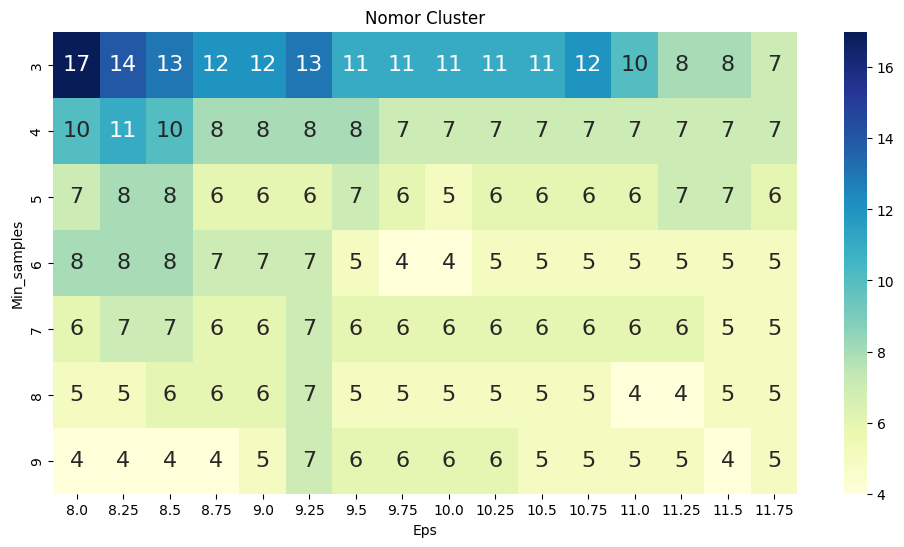

In [64]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=["Eps", "Min_samples"])
tmp["No_of_clusters"] = no_of_clusters

pivot_1 = pd.pivot_table(tmp,values="No_of_clusters", index="Min_samples",columns="Eps")

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size":16}, cmap="YlGnBu", ax=ax)
ax.set_title("Nomor Cluster")
plt.show

sebagai heatplot diatas menunjukan, nomor cluster beragam dari 17 ke 4

<function matplotlib.pyplot.show(close=None, block=None)>

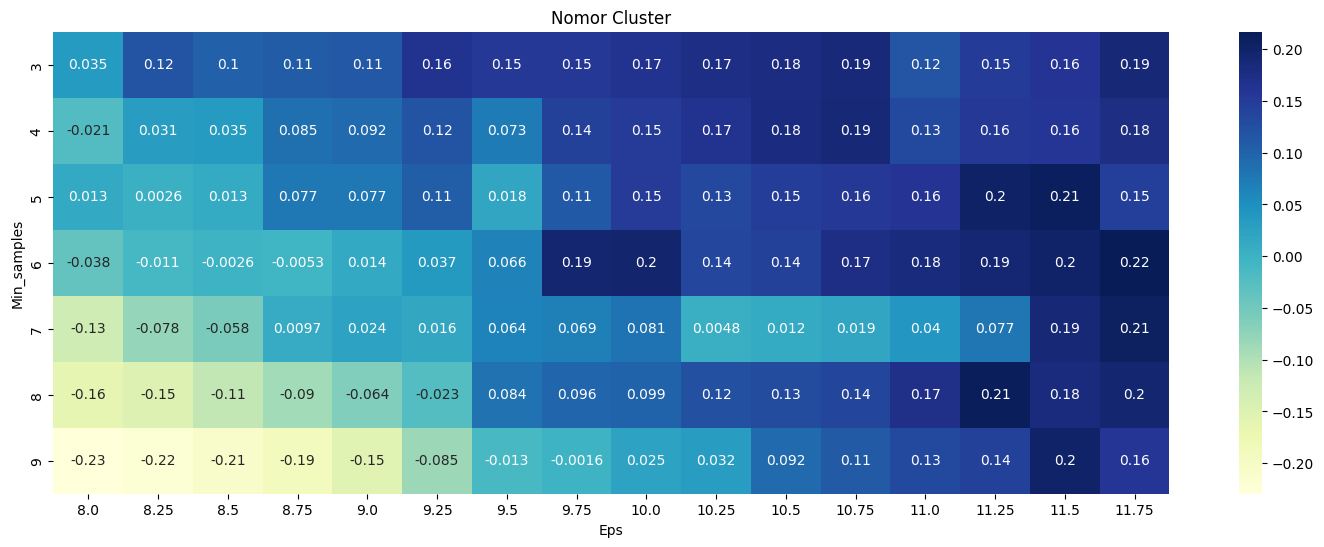

In [66]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=["Eps", "Min_samples"])
tmp["Sil_score"] = sil_score

pivot_1 = pd.pivot_table(tmp,values="Sil_score", index="Min_samples",columns="Eps")

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size":10}, cmap="YlGnBu", ax=ax)
ax.set_title("Nomor Cluster")
plt.show

maksimum global adalah 0.26 untuk eps=12,5 dan minimal sempel=4

In [69]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(x_numerics)

DBSCAN_clustered = x_numerics.copy()
DBSCAN_clustered.loc[:,"cluster"] = DBS_clustering.labels_ #tambahkan label ke point

In [71]:
DBSCAN_clust_size = DBSCAN_clustered.groupby("cluster").size().to_frame()
DBSCAN_clust_size.columns = ["DBSCAN_size"]
DBSCAN_clust_size

,DBSCAN_size
cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN membuat 5 cluster tambah outlier cluster (-1). ukuran dari cluster 0-14 sangat signifikan - bebrapa hanya punya 4 atau 8 observasi. ada 18 outliers

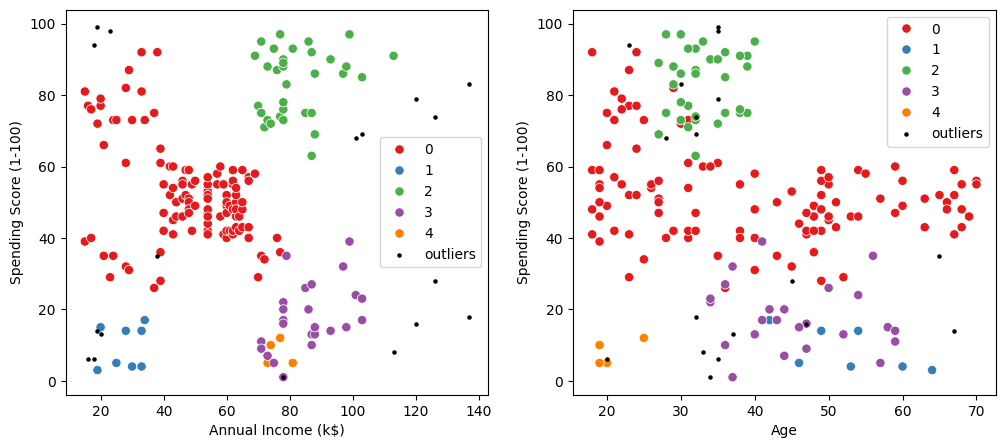

In [79]:
outliers = DBSCAN_clustered[DBSCAN_clustered["cluster"]==-1]

fig2, (axes) = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",
                data=DBSCAN_clustered[DBSCAN_clustered["cluster"]!=-1],
                hue="cluster", ax=axes[0], palette="Set1", legend="full", s=45)

sns.scatterplot(x="Age", y="Spending Score (1-100)",
                data=DBSCAN_clustered[DBSCAN_clustered["cluster"]!=-1],
                hue="cluster", ax=axes[1], palette="Set1", legend="full", s=45)

axes[0].scatter(outliers["Annual Income (k$)"], outliers["Spending Score (1-100)"], s=5, label="outliers", c="k")
axes[1].scatter(outliers["Age"], outliers["Spending Score (1-100)"], s=5, label="outliers", c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize="10") 
plt.setp(axes[1].get_legend().get_texts(), fontsize="10") 

plt.show()

grafik diatas menunjukan ada beberapa outlier - point ini tidak memenuhi jarak dan minumum sempel persyaratan yang diakui tiap cluster

### ***MeanSHift***

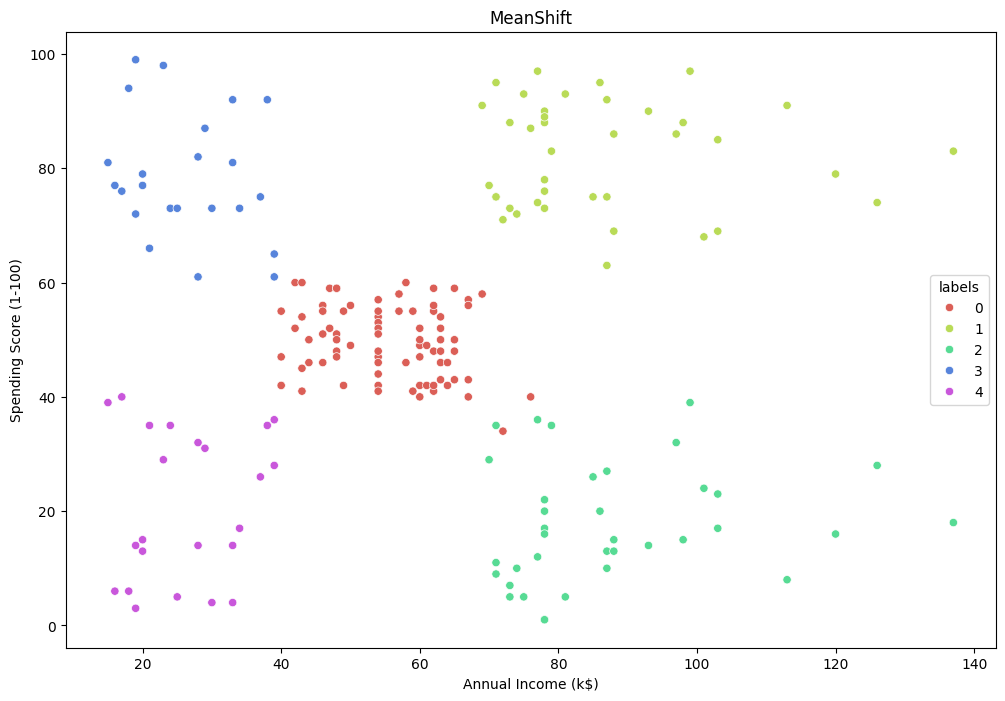

In [84]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# berikut ini bandwidth bisa jadi menggunakan automatic mendeteksi
bandwidth = estimate_bandwidth(x_numerics, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(x_numerics)

x_numerics["labels"] = ms.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=x_numerics["Annual Income (k$)"], y=x_numerics["Spending Score (1-100)"], hue=x_numerics["labels"],
                palette=sns.color_palette("hls", np.unique(ms.labels_).shape[0]))

plt.plot()
plt.title("MeanShift")
plt.show()

In [86]:
MS_clustered = x_numerics.copy()
MS_clustered.loc[:,"cluster"] = ms.labels_ #menambahkan label ke point

In [87]:
MS_clust_size = MS_clustered.groupby("cluster").size().to_frame()
MS_clust_size.columns = ["MS_size"]
MS_clust_size

,MS_size
cluster,
0,79
1,39
2,36
3,23
4,23


### ***Agglomerative Clustering***

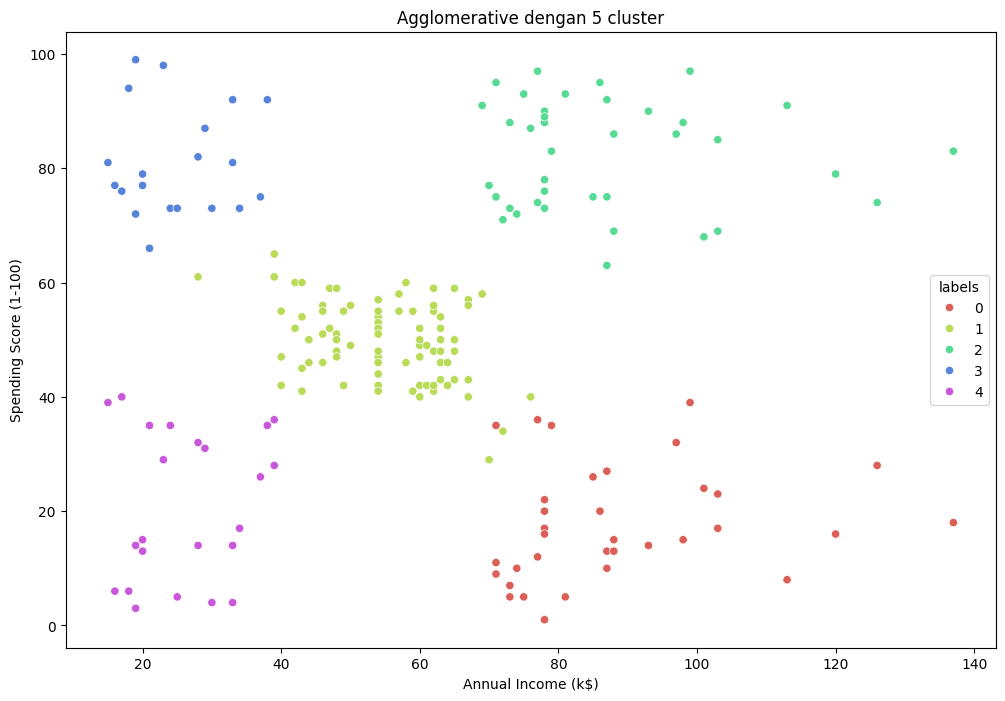

In [89]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage="average").fit(x_numerics)

x_numerics["labels"] = agglom.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=x_numerics["Annual Income (k$)"], y=x_numerics["Spending Score (1-100)"], hue=x_numerics["labels"],
                palette=sns.color_palette("hls",5))

plt.title("Agglomerative dengan 5 cluster")
plt.show()

In [90]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(x_numerics, x_numerics)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


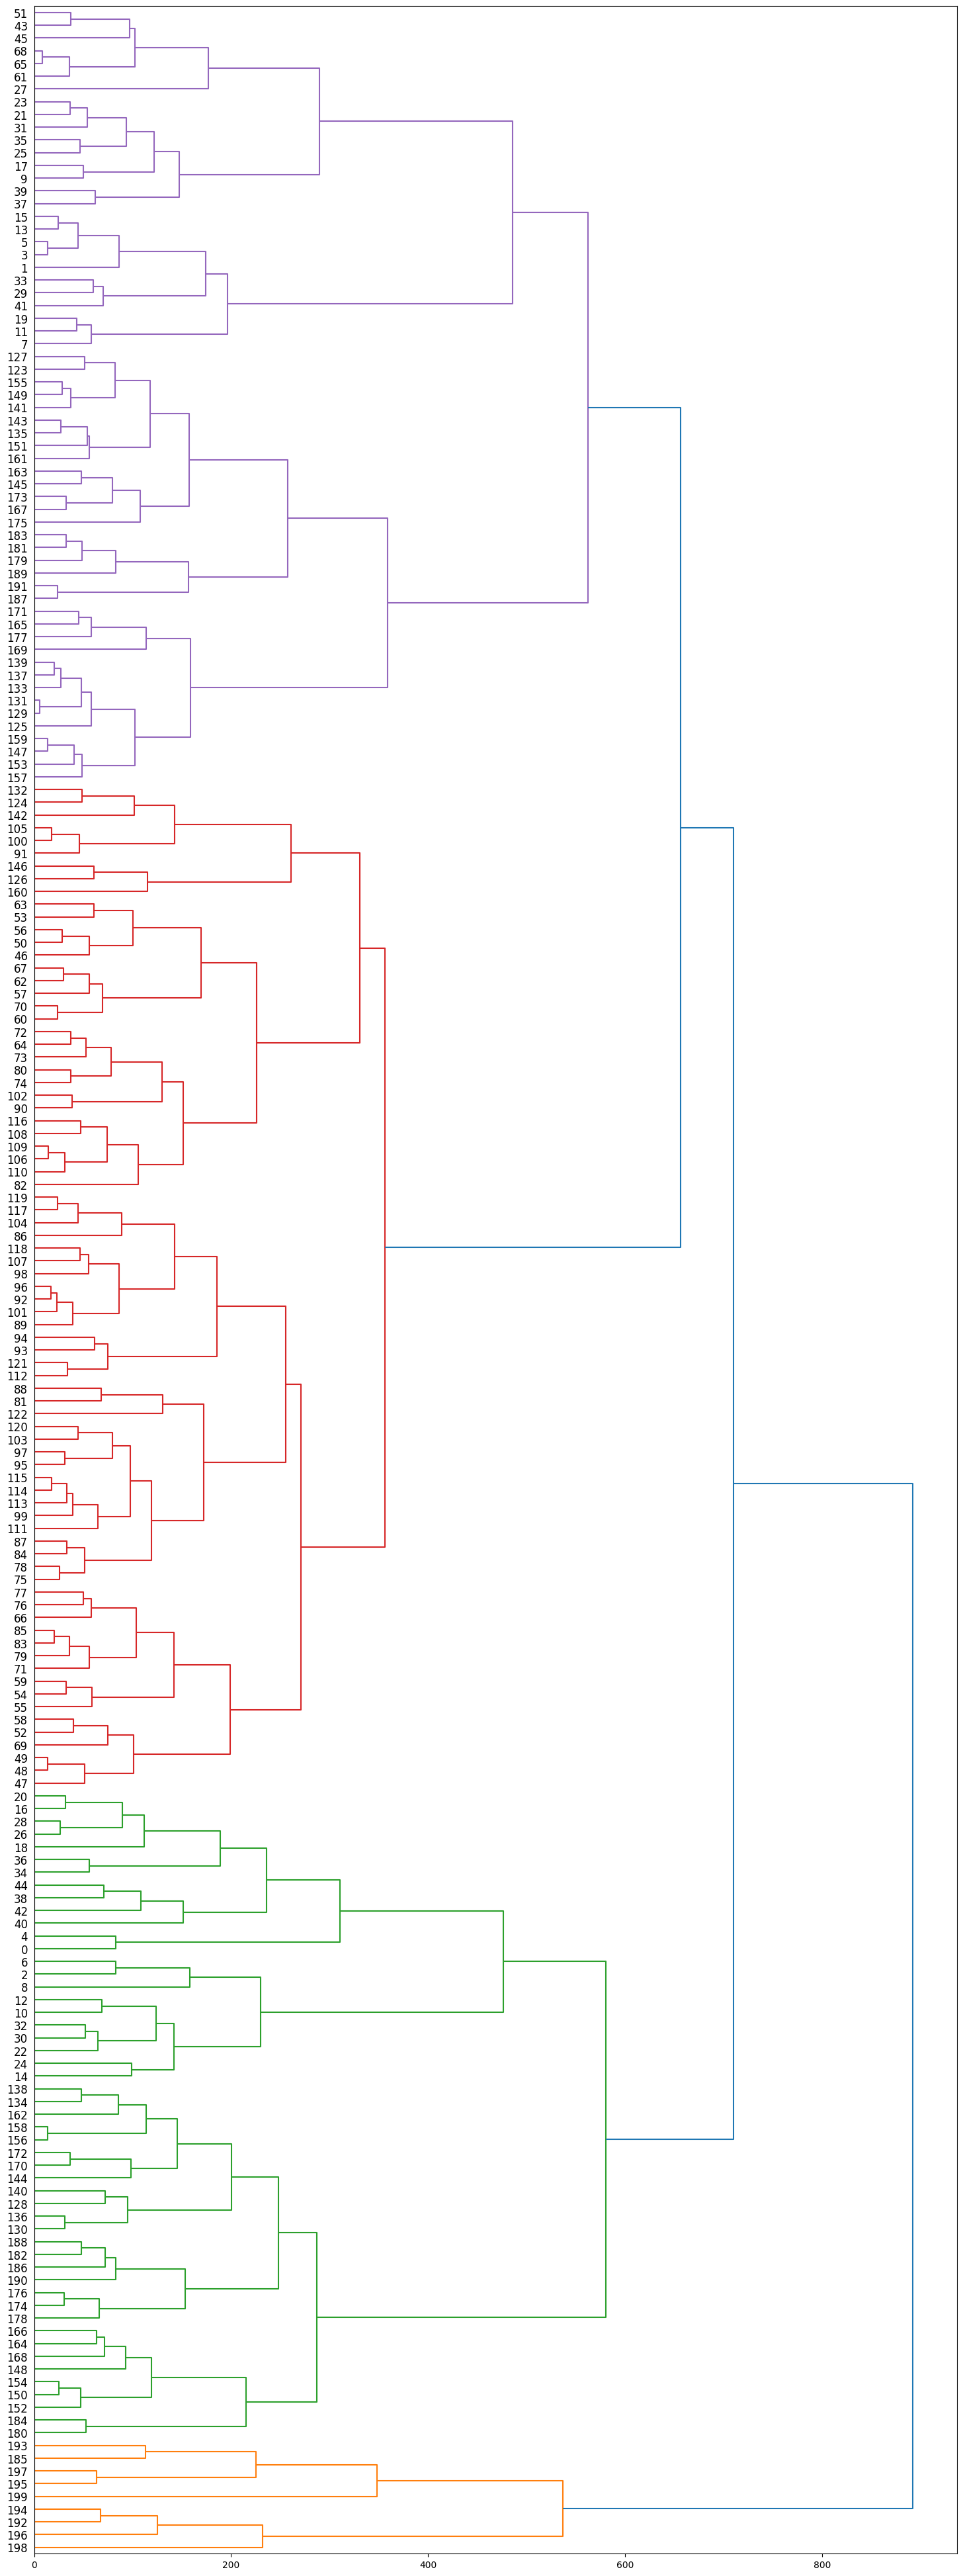

In [91]:
Z = hierarchy.linkage(dist, "complete")
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_font_size=12, leaf_rotation=0, orientation="right")

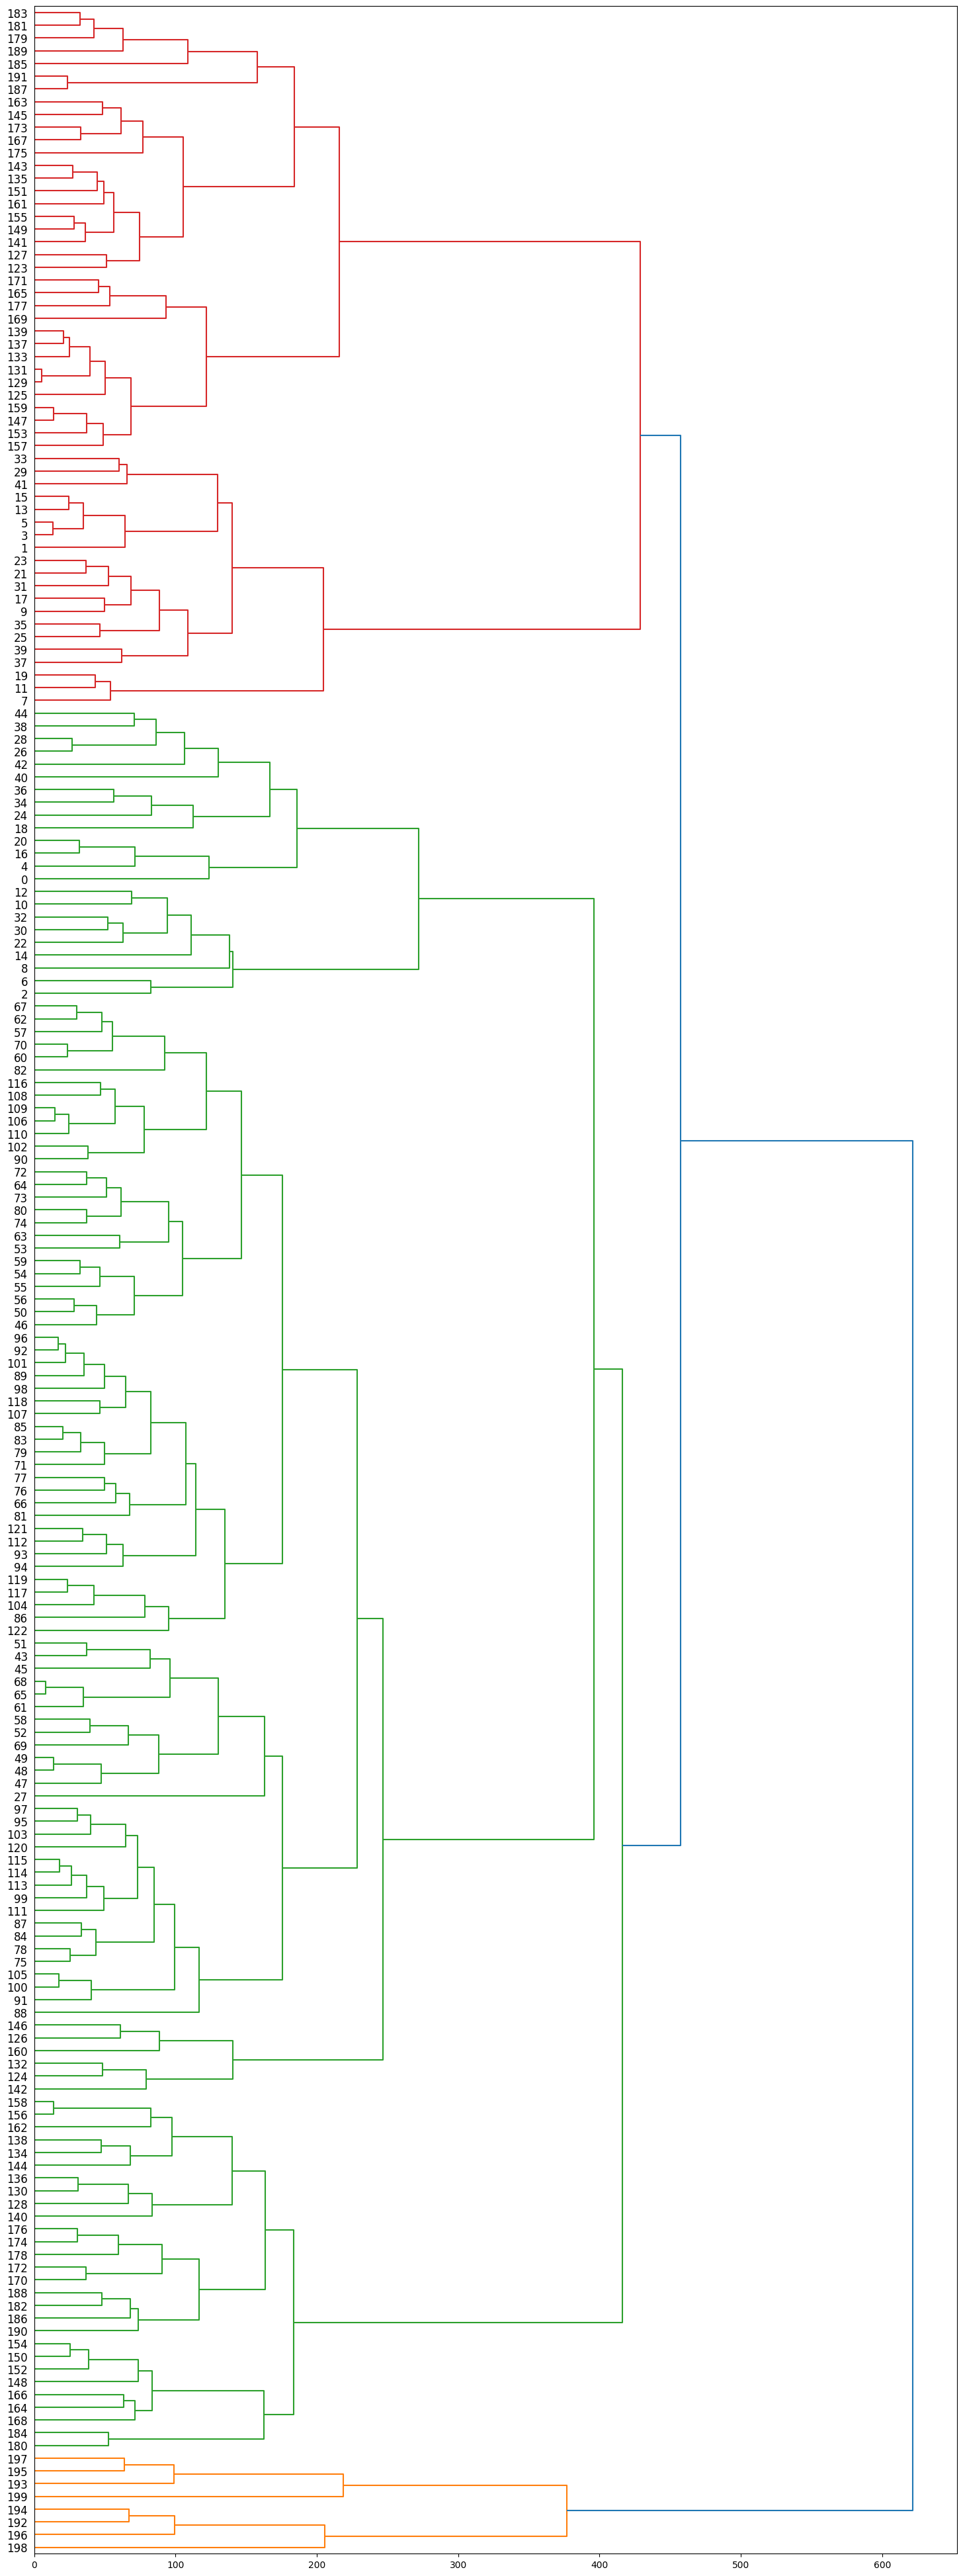

In [92]:
Z = hierarchy.linkage(dist, "average")
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_font_size=12, leaf_rotation=0, orientation="right")

In [93]:
agg_clustered = x_numerics.copy()
agg_clustered.loc[:,"Cluster"] = agglom.labels_ 

In [95]:
Agg_clust_size = agg_clustered.groupby("Cluster").size().to_frame()
Agg_clust_size.columns = ["Agg_size"]
Agg_clust_size

,Agg_size
Cluster,
0,35
1,83
2,39
3,20
4,23


melihat kedalam ukuran cluster diseluruh algoritma

In [96]:
clusters = pd.concat([KM5_clust_size,DBSCAN_clust_size,MS_clust_size,Agg_clust_size], axis=1, sort=False)
clusters

,KM5_size,DBSCAN_size,MS_size,Agg_size
0,23.0,112,79.0,35.0
1,54.0,8,39.0,83.0
2,39.0,34,36.0,39.0
3,50.0,24,23.0,20.0
4,34.0,4,23.0,23.0
-1,NaN,18,NaN,NaN


## ***SOLUSI***

sepertinya K-Means dengan 6 cluster lebih merata. DBSCAN pada satu sisi yang dipikirkan adalah untuk mengeditigikasi outlier dengan sempurna dan tidak melakukan kegagalan ntuk mengenali  cluster di berbagai kepadatan (yang ada dalam kasus ini) . lain alasan untuk DBSCAN tidak melakukan dengan baik untuk ukuran sebuah data. DBSCAN dikenal untuk bagus mengerjakan ketika ukuran data besar. melakukan KMeans dengan 5 cluster.algoritma MeanSHift & AGglomarative adalah hampir serupa